## 5.2 Exercises: Heat Maps, Spatial Charts, and Contour Charts

### Libraries ad Imports

In [1]:
# Libraries
%pylab inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import webbrowser
import geopandas
from matplotlib import cm


In [3]:
# Import the file 
bb = pd.read_csv('ppg2008.csv')

#Check the header
bb.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [4]:
# Import the file 
costco = pd.read_csv('costcos-geocoded.csv')

#Check the header
costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


### Heat Map

In [23]:
# Work with the basketball data
# select columns I want to work with
bb_cols = bb[['G', '3PA', 'FGA', 'PTS']]
bb_cols.head(3)

,G,3PA,FGA,PTS
0,79,3.5,22.0,30.2
1,81,4.7,19.9,28.4
2,82,4.1,20.9,26.8


In [26]:
# Convert to int
cols_int = bb_cols.astype({'G':'int', '3PA':'int', 'FGA':'int', 'PTS':'int'})

# Group columns
bb_grp = cols_int.groupby(['G', '3PA', 'FGA', 'PTS']).mean

In [42]:
# I don't want the games column for the heatmap
cols = cols_int[['3PA', 'FGA', 'PTS']]

Text(0.5, 1.0, '3PA, FGA, & Points Scored')

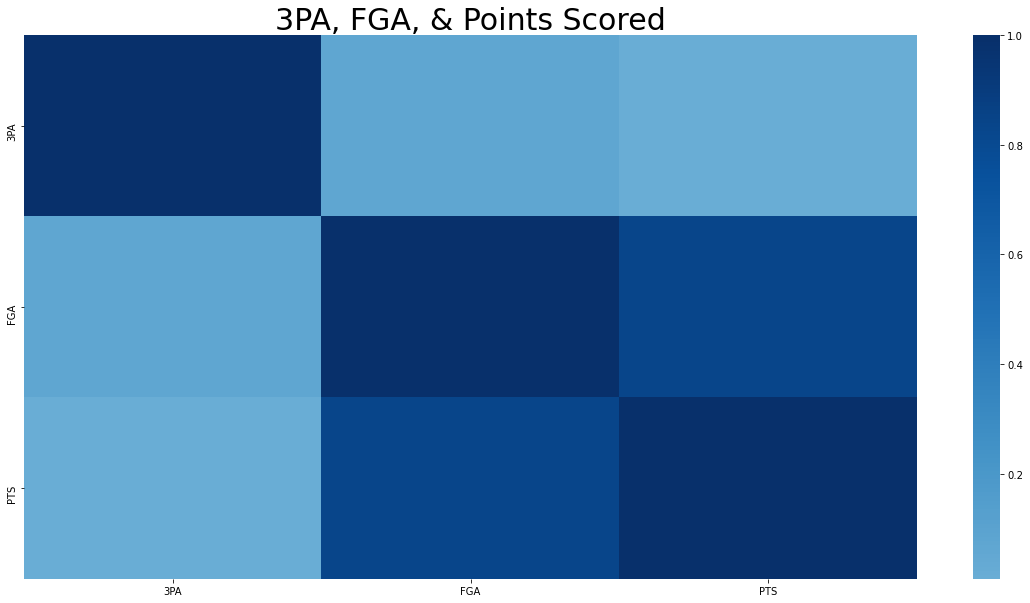

In [48]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(cols.corr(), 
            center = 0, 
            cmap = 'Blues')
ax.set_title('3PA, FGA, & Points Scored',
            fontsize = 30)

### Spatial Chart

In [90]:
# Pick the columns I want
cities = costco[['Latitude', 'Longitude', 'City']]

In [94]:
# Create the basic map
map = folium.Map(location = [cities.Latitude.mean(), 
                             cities.Longitude.mean()], 
                 zoom_start=14, control_scale = True)

In [98]:
# Create the plots for the map
for index, location_info in cities.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup = location_info["City"]).add_to(map)

# Display the map and zoom to Costcos in the Eastern US
map

### Contour Chart

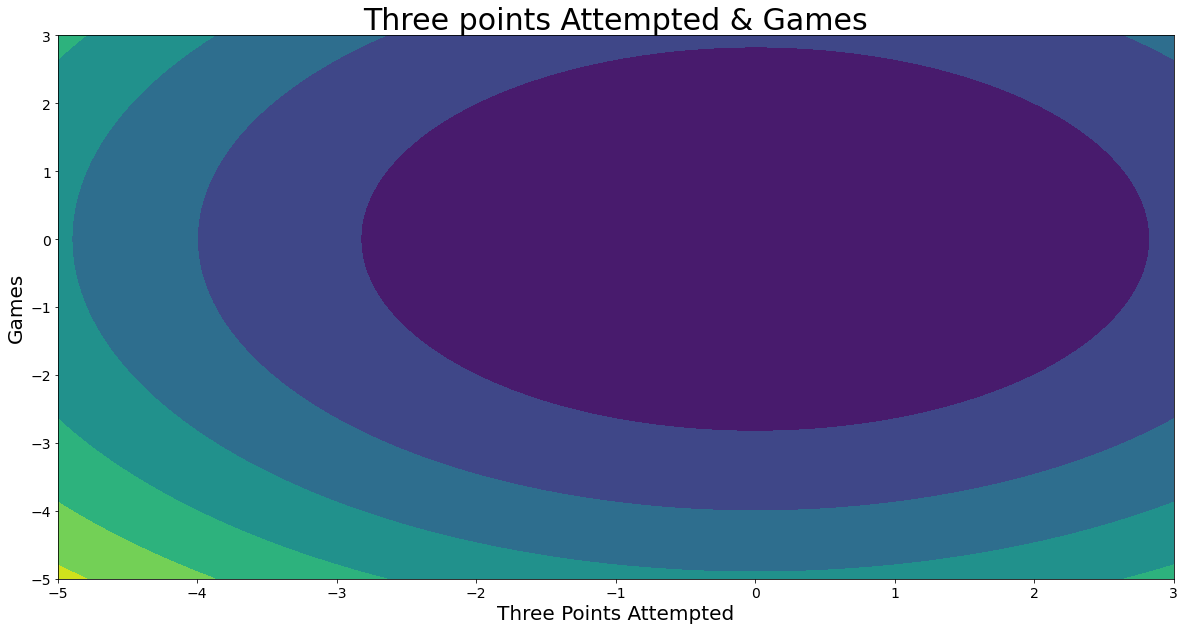

In [166]:
# Set my figure and size
fig, ax = plt.subplots(1, 1, 
                       figsize = (20, 10))

# Set my variables and features
x = cols_int[['3PA']]
y = cols_int[['G']]
feature_x = np.linspace(x)
feature_y = np.linspace(y)

[X, Y] = np.meshgrid(feature_x, feature_y)

Z = X ** 2 + Y ** 2

# Make my plot
ax.contourf(X, Y, Z)
ax.set_title('Three points Attempted & Games', 
             size = 30)
ax.set_xlabel('Three Points Attempted', 
              size = 20)
ax.set_ylabel('Games', 
              size = 20)
  
plt.show()